In [69]:
import os
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4
import cmocean
import numpy as np
from pyproj import Transformer
from pyproj import CRS
import cartopy.mpl.gridliner as gridliner
import matplotlib.ticker as mticker
import cartopy.mpl.ticker as cartopyticker
lon_formatter = cartopyticker.LongitudeFormatter()
lat_formatter = cartopyticker.LatitudeFormatter()
coordinates = [-31., 23., 46., 64]
figdir = "../figures/Video/"

In [2]:
# Start projection
myproj = cartopy.crs.Mercator(central_longitude=0.5 * (coordinates[0] + coordinates[1]), 
                     min_latitude=coordinates[2], max_latitude=coordinates[3], 
                     globe=None, latitude_true_scale=None)

In [4]:
# Read data
datafile = "../figures/Video/data_from_contaminants_data.nc"
datafile2 = "../figures/Video/data_from_chl_data.nc"

with netCDF4.Dataset(datafile, "r") as nc:
    lon = nc.variables["longitude"][:]
    lat = nc.variables["latitude"][:]
    field = nc.variables["var2"][:]
    
with netCDF4.Dataset(datafile2, "r") as nc:
    lon2 = nc.variables["longitude"][:]
    lat2 = nc.variables["latitude"][:]
    field2 = nc.variables["var2"][:,0]

## Contaminant

In [63]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=myproj)

#ax.coastlines()
scat = ax.scatter(lon, lat, s=6, c=field, vmin=0., vmax=10., 
                  cmap=plt.cm.inferno_r, zorder=5,
                  transform=ccrs.PlateCarree())
cb = plt.colorbar(scat, extend="max", shrink=.5, pad=0.02)
cb.set_label("[$\mu$g/kg]", rotation=0, ha="left", labelpad=-12.5)

ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms',
               layers=['emodnet:mean_atlas_land', 'coastlines'],
               transform=myproj)
ax.set_extent(coordinates)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='gray', alpha=0.5, linestyle='-')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator(np.arange(-30., 21., 10.))
gl.ylocator = mticker.FixedLocator(np.arange(50, 61., 5.))


plt.title("Pyrene per unit dry weight of sediment <2000 $\mu$m")
plt.savefig(os.path.join(figdir, "contaminants.png"), dpi=300, bbox_inches="tight",
            facecolor="w", transparent=False)
# plt.show()
plt.close()

## Chlorophyll

In [61]:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection=myproj)

scat = ax.scatter(lon2, lat2, s=5, c=field2, 
                  vmin=0., vmax=1., cmap=cmocean.cm.algae,
                  transform=ccrs.PlateCarree())

cb = plt.colorbar(scat, extend="max", shrink=.5, pad=0.02)
cb.set_label("[mg/m$^3$]", rotation=0, ha="left", labelpad=-12.5)

ax.set_extent(coordinates)

ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms',
               layers=['emodnet:mean_atlas_land', 'coastlines'],
               transform=myproj)


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='gray', alpha=0.5, linestyle='-')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator(np.arange(-30., 21., 10.))
gl.ylocator = mticker.FixedLocator(np.arange(50, 61., 5.))


plt.title("Water body chlorophyll-a")


plt.savefig(os.path.join(figdir, "chlorophyll_v03.png"), dpi=300, bbox_inches="tight", 
            facecolor="w", transparent=False)
# plt.show()
plt.close()

## Mercury

ConnectTimeout: HTTPSConnectionPool(host='ec.oceanbrowser.net', port=443): Max retries exceeded with url: /emodnet/Python/web/wms?service=WMS&request=GetCapabilities&version=1.1.1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7fc8eeae30a0>, 'Connection to ec.oceanbrowser.net timed out. (connect timeout=30)'))

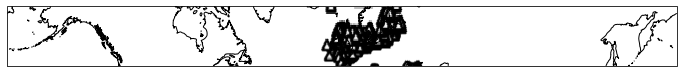

In [68]:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection=myproj)

ax.coastlines()

ax.add_wms(wms='https://nodc.inogs.it/geoserver/Contaminants/wms',
           layers='Contaminants:Mercury_a_LOD_LOQ_stations0',
           transform=myproj)


ax.set_extent(coordinates)

#ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms',
#               layers=['emodnet:mean_atlas_land', 'coastlines'],
#               transform=myproj)


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='gray', alpha=0.5, linestyle='-')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator(np.arange(-30., 21., 10.))
gl.ylocator = mticker.FixedLocator(np.arange(50, 61., 5.))


#plt.title("Water body chlorophyll-a")


#plt.savefig(os.path.join(figdir, "chlorophyll_v03.png"), dpi=300, bbox_inches="tight", 
#            facecolor="w", transparent=False)
plt.show()
plt.close()

In [ ]:
datafile = "/media/ctroupin/"
with netCDF4.Dataset